**1.1 Данные по России, начиная с 3 марта 2020 г.**

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная
с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве
целевой переменной возьмём число случаев заболевания (столбцы total_cases и
new_cases); для упрощения обработки можно заменить в столбце new_cases все
нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в
виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно
использовать в качестве тестового набора (и он даже будет увеличиваться по мере
выполнения задания).

In [ ]:
import pandas as pd
import datetime
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("owid-covid-data.csv")
df.sample(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
141070,SUR,South America,Suriname,2021-06-12,18110.0,311.0,259.714,393.0,3.0,7.714,...,7.4,42.9,67.779,3.1,71.68,0.738,NaN,NaN,NaN,NaN


In [ ]:
df = df[df["iso_code"] == "RUS"].reset_index(drop=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
DAYS = 50
FIRST_DAY = "2020-03-03"
MAY = "2020-05-01"
JUNE = "2020-06-01"
SEPTEMBER = "2020-09-01"
year_end = "2020-12-31"

df = df[df['date'] >= FIRST_DAY].reset_index(drop=True)
df = df[df['date'] <= year_end].reset_index(drop=True)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
1,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,RUS,Europe,Russia,2020-12-27,3019972.0,27849.0,28406.714,54080.0,541.0,548.286,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
300,RUS,Europe,Russia,2020-12-28,3047335.0,27363.0,28184.714,54559.0,479.0,548.000,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
301,RUS,Europe,Russia,2020-12-29,3073923.0,26588.0,27934.429,55107.0,548.0,547.571,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
302,RUS,Europe,Russia,2020-12-30,3100018.0,26095.0,27831.714,55692.0,585.0,554.571,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [ ]:
# Train and test datasets

df_train = df[:DAYS]
df_test = df[DAYS:]

**2 Постройте графики целевых переменных**

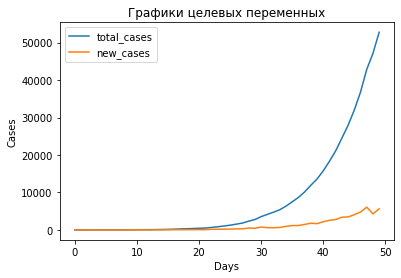

In [ ]:
plt.plot(df_train['total_cases'], label='total_cases')
plt.plot(df_train['new_cases'], label='new_cases')
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('Графики целевых переменных')
plt.legend()

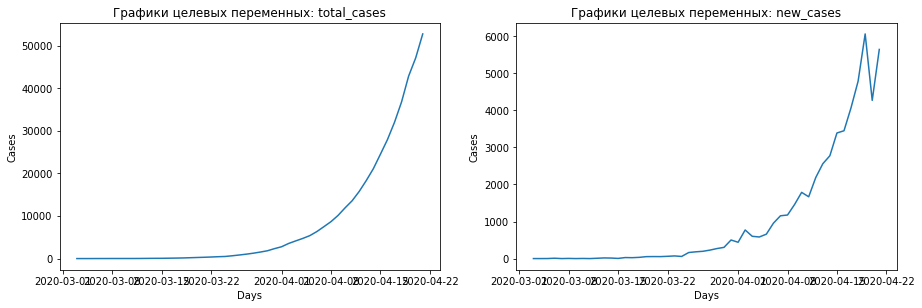

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(df_train['date'], df_train['total_cases'])
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('Графики целевых переменных: total_cases')

plt.subplot(222)
plt.plot(df_train['date'], df_train['new_cases'])
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('Графики целевых переменных: new_cases')
plt.show()

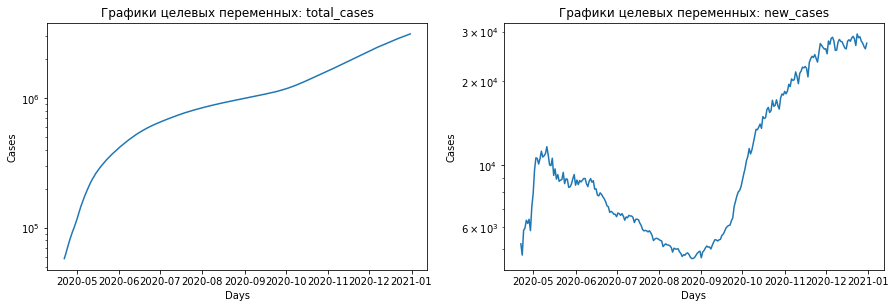

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(df_test['date'], df_test['total_cases'])
plt.xlabel("Days")
plt.ylabel("Cases")
plt.semilogy()
plt.title('Графики целевых переменных: total_cases')

plt.subplot(222)
plt.plot(df_test['date'], df_test['new_cases'])
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('Графики целевых переменных: new_cases')
plt.semilogy()
plt.show()

**2.a**

Используя линейную регрессию, обучите модель с экспоненциальным
ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер
текущего дня.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(np.array(df_train.index)[..., None], np.log(df_train['total_cases'].values[..., None]))

LinearRegression()

In [ ]:
preds = model.predict(np.array(df_train.index)[..., None])

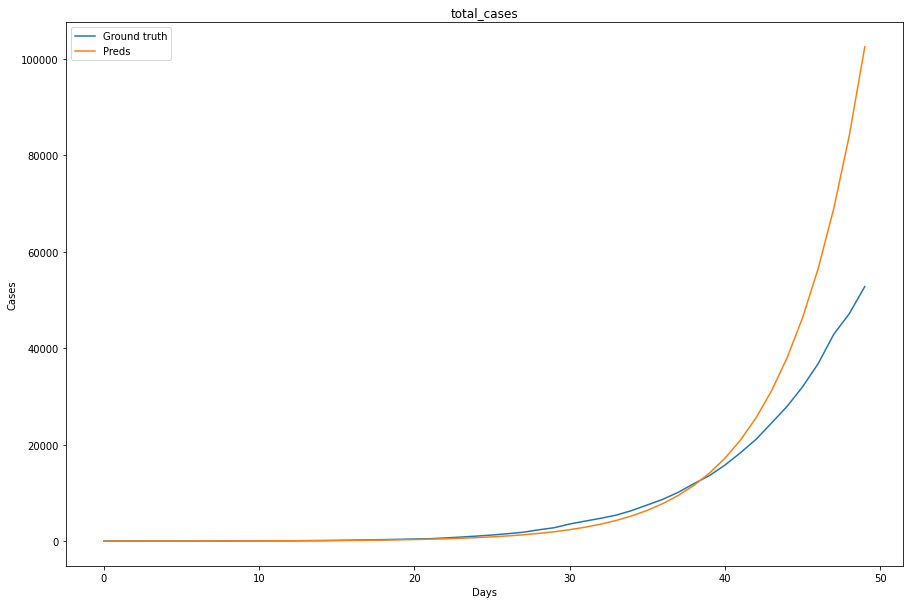

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(np.array(df_train.index), df_train['total_cases'].values, label="Ground truth")
plt.plot(np.array(df_train.index), np.exp(preds), label="Preds")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('total_cases')
plt.legend()
plt.show()

In [ ]:
preds_df = model.predict(np.array(df.index)[..., None])

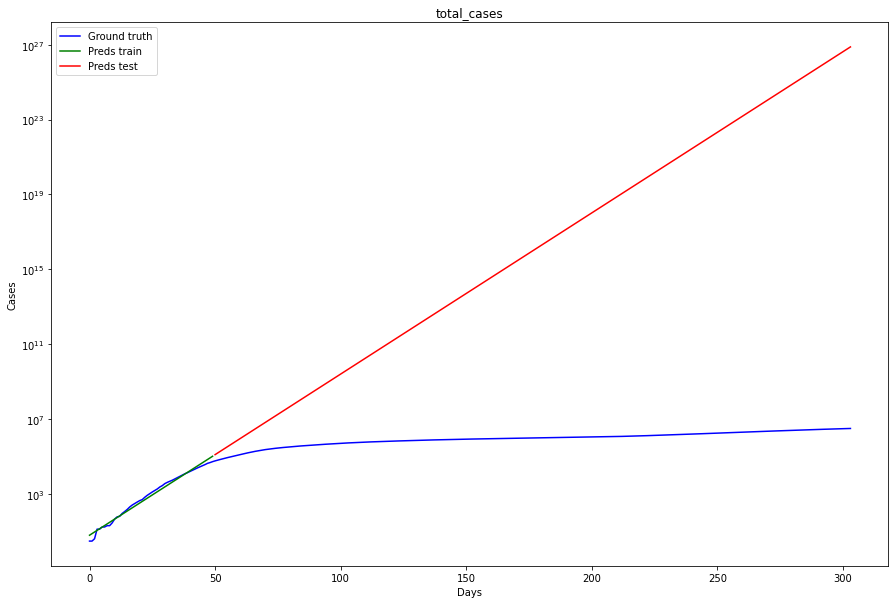

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(np.array(df.index), df['total_cases'].values, label="Ground truth", c="b")
plt.plot(np.array(df.index)[:DAYS], np.exp(preds_df)[:DAYS], label="Preds train", c="g")
plt.plot(np.array(df.index)[DAYS:], np.exp(preds_df)[DAYS:], label="Preds test", c="r")
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title('total_cases')
plt.legend()
plt.semilogy() # plot in log-scale
plt.show()

**2.b**

Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели (это фактически первый шаг
эмпирического Байеса).

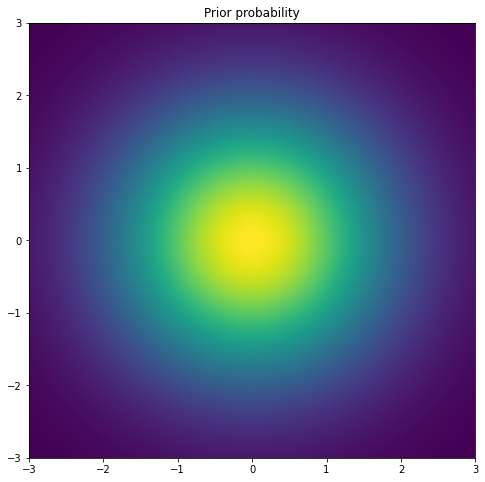

In [ ]:
from scipy.stats import multivariate_normal

dis = np.std((preds_df[:DAYS].flatten() - np.log(df['total_cases'].values[:DAYS]))**2)**2
lambda_ = 0.01
alpha = dis / lambda_

nums = 1000
array_x = np.linspace(-3, 3, nums)
array_y = np.linspace(-3, 3, nums)
X, Y = np.meshgrid(array_x, array_y)

meshgrid = np.zeros((nums, nums, 2))
meshgrid[:, :, 0] = X
meshgrid[:, :, 1] = Y

    
mu, sigma = np.array([0, 0]), np.array([[np.sqrt(alpha), 0], [0, np.sqrt(alpha)]])

Z = multivariate_normal.pdf(meshgrid, mu, sigma)

plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, Z)
plt.title("Prior probability")
plt.show()

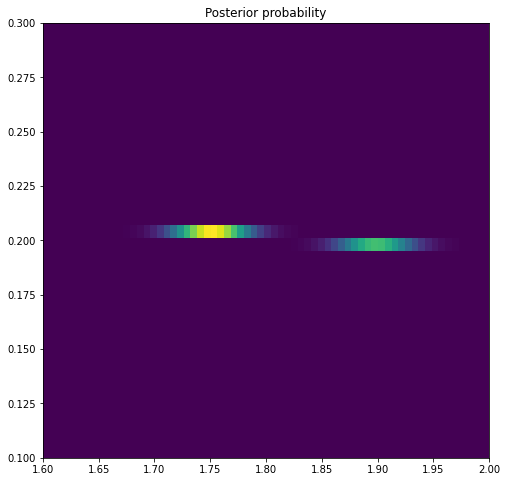

In [ ]:
def sigma_mu(mu, sigma, x, y, noise):
    maxtrice = np.array([[1, x]])
    sigma_ = np.linalg.inv(sigma) + (1 / (noise ** 2)) * np.matmul(maxtrice.T, maxtrice)
    sigma_ = np.linalg.inv(sigma_)
    temp = (1 / (noise ** 2)) * (maxtrice.T @ np.array([y])) + np.linalg.inv(sigma) @ mu.T
    mu_ = sigma_ @ temp
    return mu_, sigma_

for x, y in zip(np.array(df.index)[:DAYS], np.log(df['total_cases'].values[:DAYS])):
    mu, sigma = sigma_mu(mu, sigma, x, y, np.sqrt(dis))

Z = multivariate_normal.pdf(meshgrid, mu, sigma)

plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, Z)
plt.xlim(1.6, 2)
plt.ylim(0.1, 0.3)
plt.title("Posterior probability")
plt.show()

**2.c**

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя
из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к
1 июня? к 1 сентября? Постройте предсказательные распределения (можно
эмпирически, исходя из данных сэмплирования).

In [ ]:
def sampling(mu, sigma, days=np.arange(0, 70), n=200, df=df_train):
    weights = np.random.multivariate_normal(mu, sigma, n)
    for i, weight in enumerate(weights):
        fx = np.exp(weight[0] + weight[1] * days)
        plt.plot(days, fx, alpha=0.05, c="r")
    plt.scatter(np.array(df.index), df["total_cases"].values, c="g")

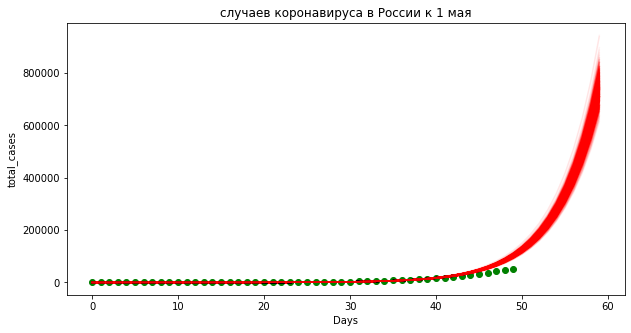

In [34]:
till_may = len(df[df['date'] <= MAY])
till_june = len(df[df['date'] <= JUNE])
till_sep = len(df[df['date'] <= SEPTEMBER])

plt.figure(figsize=(10, 5))
sampling(mu, sigma, days=np.arange(till_may), n=1000, df=df_train)
plt.title("случаев коронавируса в России к 1 мая")
plt.xlabel("Days")
plt.ylabel("total_cases")
plt.show()

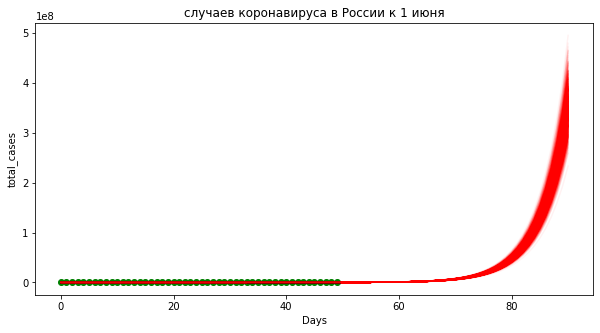

In [35]:
plt.figure(figsize=(10, 5))
sampling(mu, sigma, days=np.arange(till_june), n=1000, df=df_train)
plt.title("случаев коронавируса в России к 1 июня")
plt.xlabel("Days")
plt.ylabel("total_cases")
plt.show()

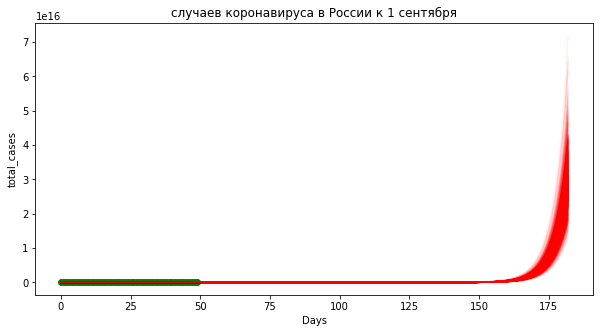

In [36]:
plt.figure(figsize=(10, 5))
sampling(mu, sigma, days=np.arange(0, till_sep), n=1000, df=df_train)
plt.title("случаев коронавируса в России к 1 сентября")
plt.xlabel("Days")
plt.ylabel("total_cases")
plt.show()

<Figure size 1152x432 with 0 Axes>

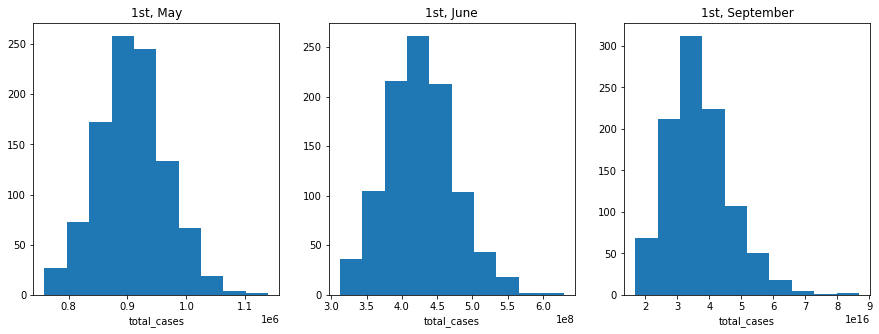

In [ ]:
dates = [till_may, till_june, till_sep]
months = ['1st, May', '1st, June', '1st, September']

def samples(df, mu, sigma, n=1000):
    output = [[], [], []]
    my_w = np.random.multivariate_normal(mu, sigma, n)
    plt.figure(figsize=(16,6))
    x = np.array(df.index)
    for w in my_w:
        cur_cases = np.exp(w[0] + w[1]*x)
        for i in range(len(dates)):
            output[i].append(cur_cases[dates[i]])
    return np.array(output)
    
output = samples(df, mu, sigma)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(dates)):
    ax[i].hist(output[i])
    ax[i].set_title(months[i])
    ax[i].set_xlabel('total_cases')

**3.**

Предсказания экспоненциальной модели наверняка получились грустными. Но это,
конечно, чересчур пессимистично — экспоненциальный рост в природе никак не
может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в
реальности имеет сигмоидальный вид: после начальной фазы экспоненциального
роста неизбежно происходит насыщение. В качестве конкретной формы такой
сигмоиды давайте возьмём форму функции распределения для гауссиана


$$\Phi(x)= \frac{1}{\sqrt{2\pi}}\int^{x}_{-\inf}e^{-t^2/2}dt$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа
перед интегралом может быть произвольной (и её можно внести в экспоненту), а в
экспоненте под интегралом может быть произвольная квадратичная функция от t.

**3.a**

Предложите способ обучать параметры такой сигмоидальной функции при
помощи линейной регрессии.

Firstly, let's take derivative and logarithm to remove exponent. So total cases are sums of new cases till specific period of time.


**3.b**

Обучите эти параметры на датасете случаев коронавируса в России.
Найдите апостериорное распределение параметров этой модели для
достаточно широкого априорного распределения. Требующееся для этого
значение дисперсии шума в данных оцените, исходя из вашей же
максимальной апостериорной модели.

In [ ]:
import functools 


def func(x, degree):
    return np.hstack([(x ** d).reshape(-1, 1) for d in range(degree + 1)])

df_ = df_train.copy()
df_['new_cases'] = df_['new_cases'].replace({0: 1})

function = functools.partial(func, degree=2)
X = np.array(df_.index).reshape(-1, 1) + 1
y_total = df_["total_cases"].values.reshape(-1, 1)
y = df_["new_cases"].values.reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(function(X), np.log(y))

model.coef_[:, 0] = model.intercept_
w = model.coef_.T

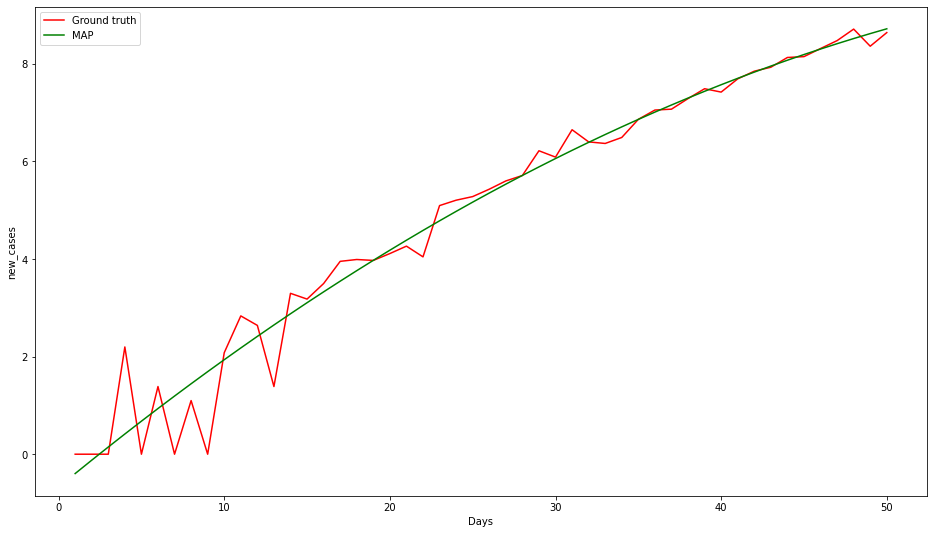

In [ ]:
plt.figure(figsize=(16, 9))

plt.plot(X, np.log(y), label="Ground truth", c="r")
plt.plot(X, function(X) @ w, color="g", label="MAP")

plt.xlabel("Days")
plt.ylabel("new_cases")
plt.legend()
plt.show()

In [ ]:
noise = np.var(np.log(y) - function(X) @ w)

m = np.zeros((w.shape[0], 1))
s = np.eye(w.shape[0]) * 10 ** 6

def params(m, S, var_noise, F, X, y):
    S_post = np.linalg.inv(np.linalg.inv(S) + F(X).T @ F(X) / var_noise)
    m_post = S_post @ (np.linalg.inv(S) @ m + F(X).T @ np.log(y) / var_noise)
    return m_post, S_post

m_, s_ = params(m, s, noise, function, X, y)

print("дисперсии шума: ", noise)
print("MAP: ", w.T)
print("Posterior probability: ", m_.T)

дисперсии шума:  0.23928684127005562
MAP:  [[-0.67404303  0.27928241 -0.00182979]]
Posterior probability:  [[-0.67404299  0.27928241 -0.00182979]]


**3.c**

Посэмплируйте много разных сигмоид из апостериорного распределения,
постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев
коронавируса в России? Постройте эмпирическое предсказательное
распределение, нарисуйте графики. Каков ваш прогноз числа случаев
коронавируса в пессимистичном сценарии (90-й процентиль в выборке
числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [ ]:
END_YEAR = "2020-12-31"
NUM_SAMPLES = 50
TILL_END = len(df[df['date'] <= END_YEAR])


def predict(m, s, F, X, n_samples=25):
    W = np.random.multivariate_normal(m.flatten(), s, NUM_SAMPLES)
    return W @ F(X).T


days = np.arange(TILL_END) + 1
preds = predict(m_, s_, function, days, NUM_SAMPLES)
preds_total = np.cumsum(np.exp(preds), axis=1)

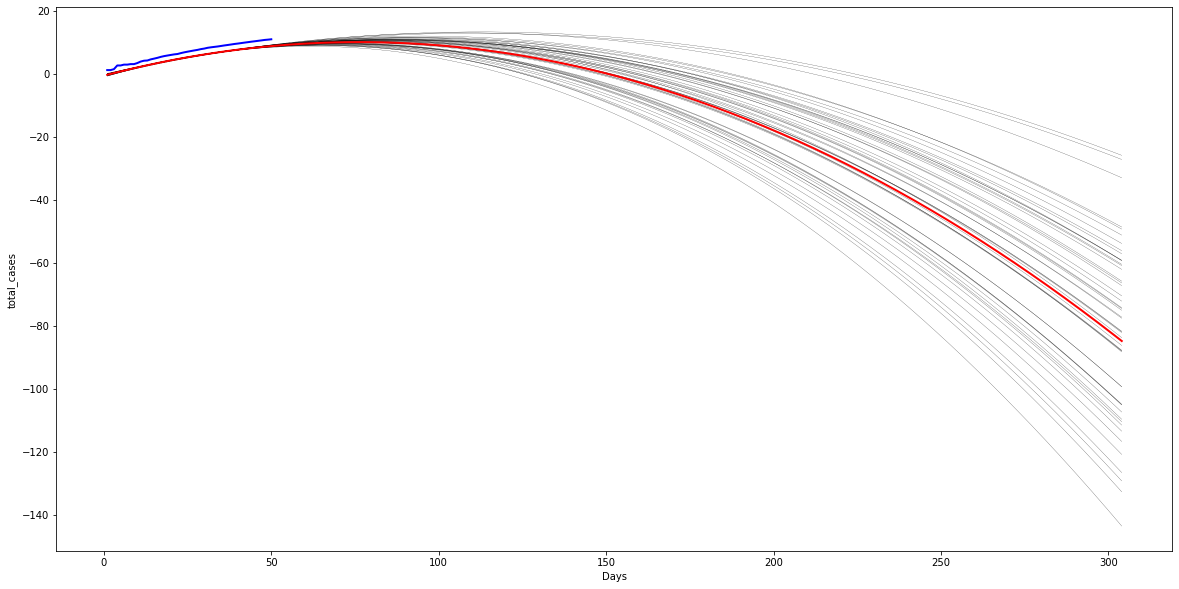

In [ ]:
plt.figure(figsize=(20, 10))

for pred in preds:
    plt.plot(days, pred, linewidth=0.2, color="black")
plt.plot(X, np.log(y_total), linewidth=2, color="blue")
plt.plot(days, function(days) @ w, linewidth=2, color="r", label="MAP")

plt.xlabel("Days")
plt.ylabel("total_cases")
plt.show()

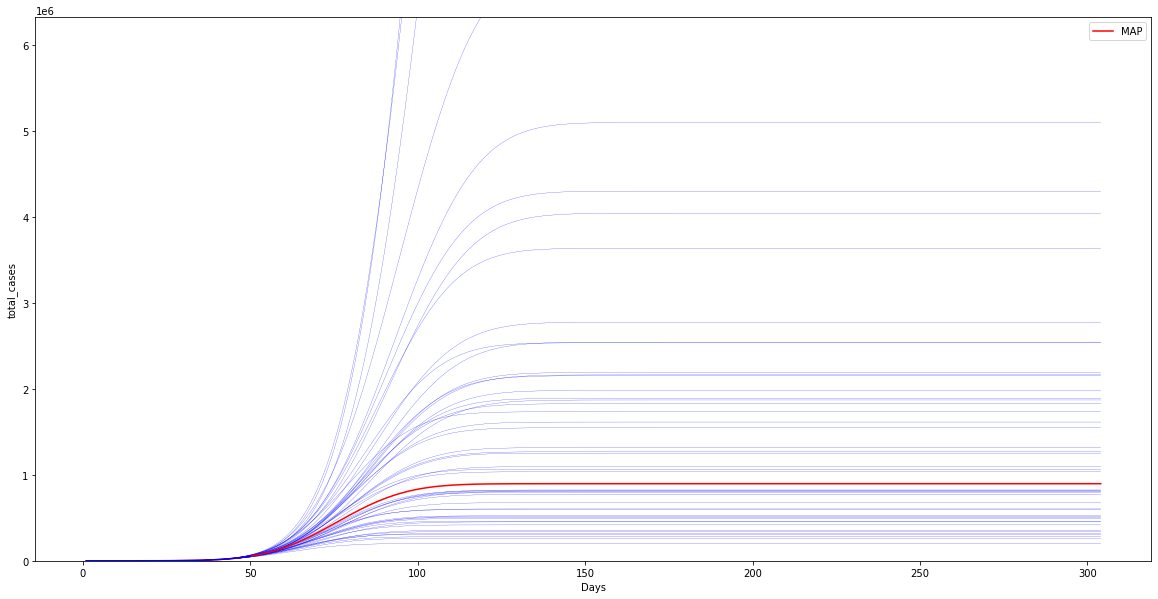

In [ ]:
plt.figure(figsize=(20, 10))


for y_pred in np.cumsum(np.exp(preds), axis=1):
    plt.plot(days, y_pred, linewidth=0.2, color="b")
plt.plot(days, np.cumsum(np.exp(function(days) @ w), axis=0), color="r", label="MAP")
plt.plot(X, y_total, color="blue")

plt.xlabel("Days")
plt.ylabel("total_cases")
plt.ylim((0, 2 * 10 ** 6.5))
plt.legend()
plt.show()

In [ ]:
NUM_SAMPLES = 10 ** 5

Y_pred = predict(m_, s_, function, days, NUM_SAMPLES)
y_pred = np.sum(np.exp(Y_pred), axis=1)

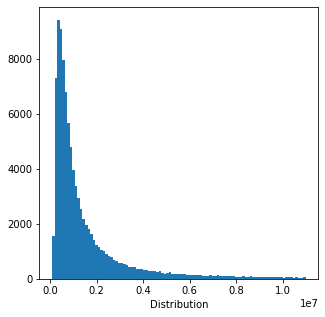

In [37]:
THRESHOLD = 95

plt.figure(figsize=(5, 5))
plt.hist(y_pred[y_pred < np.percentile(y_pred, THRESHOLD)], bins=100)
plt.xlabel("Distribution")
plt.show()

прогноз числа случаев
коронавируса в пессимистичном сценарии (90-й процентиль в выборке
числа случаев)? 

В оптимистичном сценарии (10-й процентиль)?

In [ ]:
percentiles = [10, 90]
for p in percentiles:
    x = np.percentile(y_pred, p)
    print(f"{p}% percentile: {x}")

10% percentile: 317283.1239247369
90% percentile: 5181683.158758609


**5.**  
[Эта часть задания не оценивается, здесь нет правильных и неправильных
ответов, но буду рад узнать, что вы думаете]

Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам
такого моделирования? Как принять решение, например, о том, нужно ли вводить
карантин?

Exponential function is not suitable for virus modeling, sigmoid function works better but still not good because new cases of virus might increase again. Virus modeling is quite difficult to model. Quarantine should be impose before it reach saturation and try to flatten the infection rate.